In [1]:
using Pkg
Pkg.activate(".")
using Manifolds
using ManifoldsBase
using Meshes, MeshViz
using Luxor
using Thebes
using PlyIO

  Activating project at `~/MEGA/EMAp/Modelagem-Matematica-Julia/Notebooks/Manifolds`
┌ Warning: Package Luxor does not have MathTeXEngine in its dependencies:
│ - If you have Luxor checked out for development and have
│   added MathTeXEngine as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Luxor
│ Loading MathTeXEngine into Luxor from project dependency, future warnings for Luxor are suppressed.
└ @ nothing nothing:984


In [2]:
file = download(
  "https://raw.githubusercontent.com/juliohm/JuliaCon2021/master/data/beethoven.ply"
)
function readply(fname)
  ply = load_ply(fname)
  x = ply["vertex"]["x"]
  y = ply["vertex"]["y"]
  z = ply["vertex"]["z"]
  points = Point3.(x, y, z)
  connec = [connect(Tuple(c.+1)) for c in ply["face"]["vertex_indices"]]
  SimpleMesh(points, connec)
end


mesh = readply(file);

In [ ]:
read("sphere.obj"

In [27]:
import Meshes

In [110]:
S = Meshes.Sphere((0.,0.,0.), 1.)
Smesh = discretize(S, RegularDiscretization(30,30));

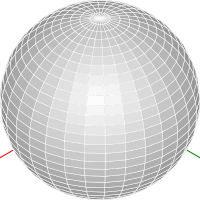

In [119]:
d = Drawing(200,200,:svg)
Luxor.origin()
helloworld()
# eyepoint(100, 400, 100)
axes3D(200)
vertices = [Point3D(p.coords) for p in Smesh.points]
faces = [[f.indices...] for f in Smesh.topology.connec];
sphere = make((vertices,faces))

setline(0.5)
scaleby!(sphere, 100, 100, 100)
pin(sphere)
finish()
d

In [120]:

d = Drawing(500,500,:svg)
origin()
perspective(600)
eyepoint(500, 500, 500)

k = 20
xmax = 2π
ymax = 2π
st = 0.3

f(x, y) = 2(sin(x) * cos(y)) + (cos(x) * sin(y))

c(r,θ,φ) = Point3D(r .* [cos(θ), sin(θ), sin(φ)])

R = 100

for φ in 0:st:0, θ in 0:st:π
    r = R*cos(φ)
    p1 = c(r,θ,φ)
    p2 = c(r,θ+st,φ)
    
    r = R*cos(φ+st)
    p3 = c(r,θ,φ+st)
    p4 = c(r,θ+st,φ+st)
    pin([p1, p2, p3, p4], gfunction = (p3s, p2s) -> begin
        # poly(p2s, close=true, :fill)
        setline(.5)
        sethue("black")
        setopacity(0.2)
        poly(p2s, close=true, :stroke)
    end)
end



# for x in -xmax:st:xmax
#     for y in -ymax:st:ymax
#         sethue(HSB(360rescale(x, -xmax, xmax), .8, .8))
#         # sethue("black")

#         p1 = Point3D(k * x,         k * y,        k * f(x,      y))
#         p2 = Point3D(k * x,         k * (y + st), k * f(x,      y +st))
#         p3 = Point3D(k * (x + st),  k * (y + st), k * f(x + st, y + st))
#         p4 = Point3D(k * (x + st),  k * y,        k * f(x + st, y))
#         pin([p1, p2, p3, p4], gfunction = (p3s, p2s) -> begin
#             poly(p2s, close=true, :fill)
#             sethue("white")
#             poly(p2s, close=true, :stroke)
#         end)
#     end
# end

axes3D(200)
finish()
d

LoadError: UndefVarError: origin not defined